# Utfordring: Analysere tekst om datavitenskap

> *I denne notatboken eksperimenterer vi med å bruke forskjellige URL-er - Wikipedia-artikkelen om maskinlæring. Du kan se at, i motsetning til datavitenskap, inneholder denne artikkelen mange begreper, noe som gjør analysen mer problematisk. Vi må finne en annen måte å rydde opp i dataene etter å ha gjort nøkkelorduttrekk, for å bli kvitt noen hyppige, men ikke meningsfulle ordkombinasjoner.*

I dette eksempelet skal vi gjøre en enkel øvelse som dekker alle trinnene i en tradisjonell datavitenskapsprosess. Du trenger ikke å skrive noen kode, du kan bare klikke på cellene nedenfor for å kjøre dem og observere resultatet. Som en utfordring oppfordres du til å prøve denne koden med forskjellige data.

## Mål

I denne leksjonen har vi diskutert ulike konsepter relatert til datavitenskap. La oss prøve å oppdage flere relaterte konsepter ved å gjøre litt **tekstanalyse**. Vi starter med en tekst om datavitenskap, trekker ut nøkkelord fra den, og prøver deretter å visualisere resultatet.

Som tekst vil jeg bruke siden om datavitenskap fra Wikipedia:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Steg 1: Hente dataene

Første steg i enhver datavitenskapelig prosess er å hente dataene. Vi vil bruke `requests`-biblioteket til dette:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Steg 2: Transformere dataen

Neste steg er å konvertere dataen til en form som er egnet for videre behandling. I vårt tilfelle har vi lastet ned HTML-kildekoden fra siden, og vi må konvertere den til ren tekst.

Det finnes mange måter å gjøre dette på. Vi vil bruke det enkleste innebygde objektet [HTMLParser](https://docs.python.org/3/library/html.parser.html) fra Python. Vi må opprette en underklasse av `HTMLParser`-klassen og definere koden som skal samle all tekst inne i HTML-tagger, unntatt `<script>`- og `<style>`-tagger.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Steg 3: Få innsikt

Det viktigste steget er å omgjøre dataene våre til en form som vi kan trekke innsikt fra. I vårt tilfelle ønsker vi å trekke ut nøkkelord fra teksten og se hvilke nøkkelord som er mest meningsfulle.

Vi skal bruke Python-biblioteket [RAKE](https://github.com/aneesha/RAKE) for nøkkelorduttrekk. Først, la oss installere dette biblioteket i tilfelle det ikke allerede er installert:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Hovedfunksjonaliteten er tilgjengelig fra `Rake`-objektet, som vi kan tilpasse ved hjelp av noen parametere. I vårt tilfelle vil vi sette minimumslengden på et nøkkelord til 5 tegn, minimumsfrekvensen av et nøkkelord i dokumentet til 3, og maksimalt antall ord i et nøkkelord til 2. Føl deg fri til å eksperimentere med andre verdier og observere resultatet.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Vi fikk en liste over termer sammen med tilhørende viktighetsgrad. Som du kan se, er de mest relevante fagområdene, som maskinlæring og big data, til stede i listen på topposisjonene.

## Steg 4: Visualisere resultatet

Folk forstår data best i visuell form. Derfor gir det ofte mening å visualisere dataene for å trekke noen innsikter. Vi kan bruke `matplotlib`-biblioteket i Python til å plotte en enkel fordeling av nøkkelordene med deres relevans:


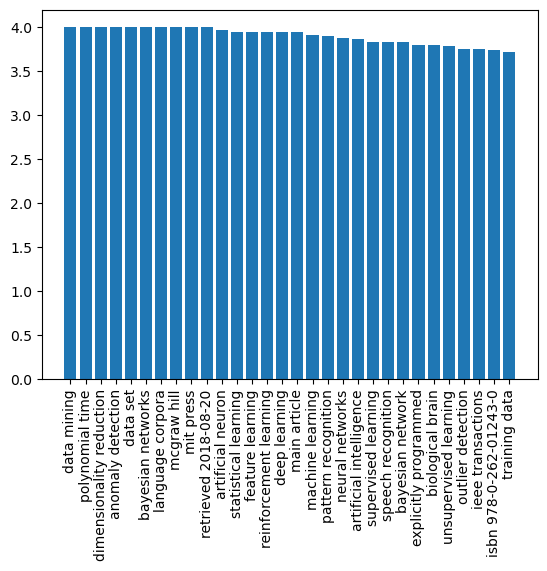

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Det finnes imidlertid en enda bedre måte å visualisere ordfrekvenser på - ved å bruke **Word Cloud**. Vi må installere et annet bibliotek for å lage ordskyen fra nøkkelordlisten vår.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`-objektet er ansvarlig for å ta inn enten originaltekst eller en forhåndsberegnet liste over ord med deres frekvenser, og returnerer et bilde som deretter kan vises ved hjelp av `matplotlib`:


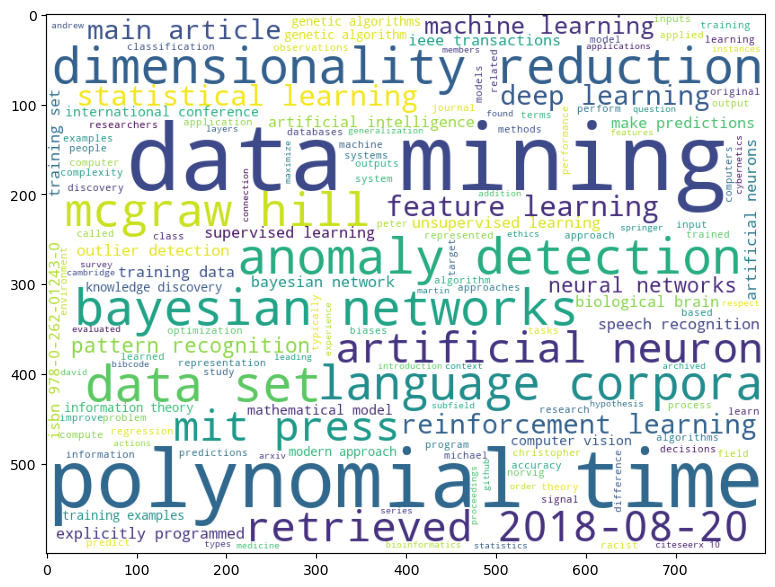

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Vi kan også sende inn den opprinnelige teksten til `WordCloud` - la oss se om vi klarer å få et lignende resultat:


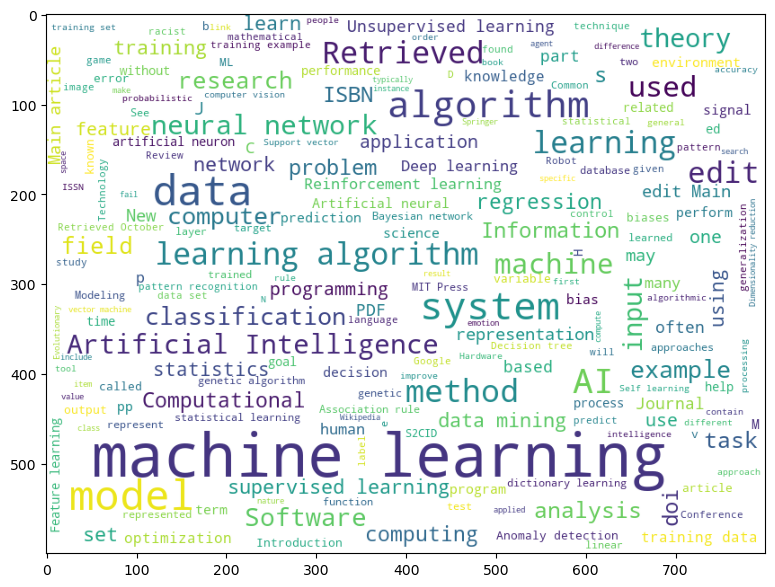

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Du kan se at ordskyen nå ser mer imponerende ut, men den inneholder også mye støy (f.eks. irrelevante ord som `Retrieved on`). I tillegg får vi færre nøkkelord som består av to ord, slik som *data scientist* eller *computer science*. Dette skyldes at RAKE-algoritmen gjør en mye bedre jobb med å velge gode nøkkelord fra teksten. Dette eksempelet illustrerer viktigheten av dataforbehandling og rengjøring, fordi et klart bilde til slutt vil gjøre det mulig for oss å ta bedre beslutninger.

I denne øvelsen har vi gått gjennom en enkel prosess for å hente ut noe mening fra Wikipedia-tekst, i form av nøkkelord og ordsky. Dette eksempelet er ganske enkelt, men det demonstrerer godt alle typiske steg en dataforsker vil ta når de jobber med data, fra datainnsamling til visualisering.

I vårt kurs vil vi diskutere alle disse stegene i detalj.



---

**Ansvarsfraskrivelse**:  
Dette dokumentet er oversatt ved hjelp av AI-oversettelsestjenesten [Co-op Translator](https://github.com/Azure/co-op-translator). Selv om vi tilstreber nøyaktighet, vennligst vær oppmerksom på at automatiske oversettelser kan inneholde feil eller unøyaktigheter. Det originale dokumentet på sitt opprinnelige språk bør anses som den autoritative kilden. For kritisk informasjon anbefales profesjonell menneskelig oversettelse. Vi er ikke ansvarlige for eventuelle misforståelser eller feiltolkninger som oppstår ved bruk av denne oversettelsen.
